# ヒューリスティック方策

https://github.com/openai/gym/tree/master/examples/agents

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

In [2]:
def policy(observation, policy_id):
    
    # 手動で方策設計
    if policy_id == 0:
        action = env.action_space.sample()    # ランダム方策
    elif policy_id == 1:
        action = int(observation[2] > 0)  # 角度を使ったヒューリスティック方策
    elif policy_id == 2:
        action = int(observation[3] > 0) # 角速度を使ったヒューリスティック方策
    else:
        action = 0
        
    return action

In [3]:
policy_id = 0

all_obs = []
all_final_step = []

import gym
env = gym.make('CartPole-v0')
env.seed(0)

for i_episode in range(10):    # 10エピソード回す
    
    observation = env.reset()    # 環境を初期化し、最初の観測を得る。

    action = policy(observation, policy_id)  # 行動選択    
    
    all_obs.append(observation)    # 観測を記録
    
    for t in range(100):    # 各エピソードの最大ステップ数は100
        env.render()
        #print(observation)
        
        observation, reward, done, info = env.step(action)    # 選択した行動の実行

        action = policy(observation, policy_id)  # 行動選択
        
        all_obs.append(observation)    # 観測を記録        
        
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

    all_final_step.append(t+1)
    print("episode: {0}\tfinal step: {1}".format(i_episode+1, t+1))
    print("==========================")
    
all_final_step = np.array(all_final_step)
print("mean steps: {0:.2f} (+/-{1:.2f})".format(np.mean(all_final_step), np.std(all_final_step)))

[2017-01-20 18:23:47,877] Making new env: CartPole-v0


Episode finished after 14 timesteps
episode: 1	final step: 14
Episode finished after 14 timesteps
episode: 2	final step: 14
Episode finished after 16 timesteps
episode: 3	final step: 16
Episode finished after 20 timesteps
episode: 4	final step: 20
Episode finished after 47 timesteps
episode: 5	final step: 47
Episode finished after 14 timesteps
episode: 6	final step: 14
Episode finished after 27 timesteps
episode: 7	final step: 27
Episode finished after 33 timesteps
episode: 8	final step: 33
Episode finished after 18 timesteps
episode: 9	final step: 18
Episode finished after 11 timesteps
episode: 10	final step: 11
mean steps: 21.40 (+/-10.66)


In [4]:
env.render(close=True)

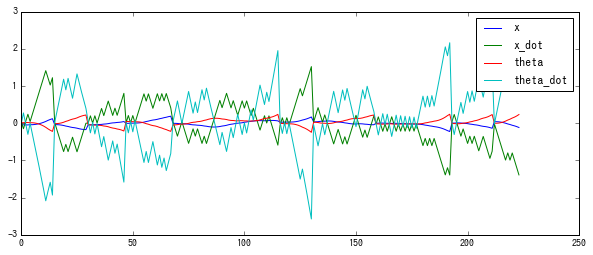

In [5]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.array(all_obs))
ax.legend(['x', 'x_dot', 'theta', 'theta_dot'])